<a href="https://colab.research.google.com/github/alunfes/1m-btc-data/blob/master/LGBM_Vola_Rrgression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Aug 20 11:53:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cp -rp '/content/drive/My Drive/ta-lib/' ~/
%cd ~
!rm -rf ta-lib*
#!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!wget https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
#%cd '/content/drive/My Drive/ta-lib'
#%cd ta-lib
import os
#os.chdir('/content/drive/My Drive/ta-lib') # Can't use !cd in co-lab
os.chdir('ta-lib') # Can't use !cd in co-lab
#%cd ~/ta-lib
!./configure --prefix=/usr
#! '/content/drive/My Drive/ta-lib/configure' --prefix=/usr
!make
!make install
!pip install Ta-Lib
%cd /content

/root
--2022-08-20 11:53:16--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving sourceforge.net (sourceforge.net)... 172.64.153.13, 104.18.34.243
Connecting to sourceforge.net (sourceforge.net)|172.64.153.13|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/ [following]
--2022-08-20 11:53:16--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/download [following]
--2022-08-20 11:53:17--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/download
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 302 Found
Locat

In [ ]:
!pip install optuna
!pip install joblib
!pip install six
!pip install bayesian-optimization
#!pip install stable-baselines3 --upgrade
#!pip install tensorboardcolab
#!pip --no-cache-dir install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
#!pip install lightgbm --install-option=--GPU
#!sudo pip --no-cache-dir install -I lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

import lightgbm as lgb
from sklearn import datasets
import dateutil
import copy
import sqlite3
from math import ceil, floor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pickle
import csv
import math
import talib as ta
import matplotlib.pyplot as plt
from scipy.spatial.distance import correlation
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, timezone
import sklearn.metrics
from sklearn.model_selection import train_test_split
from functools import partial
import optuna
import joblib
from joblib import Parallel, delayed
import time
import random
import collections

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 7.9 MB/s 
     |████████████████████████████████| 81 kB 12.0 MB/s 
     |████████████████████████████████| 209 kB 55.1 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 112 kB 87.2 MB/s 
     |████████████████████████████████| 147 kB 68.3 MB/s 
     |████████████████████████████████| 49 kB 8.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=1e8e438ee3b15cc527514d6efc35593cf587bedcb9a9cef81c6b9caac8e48c38
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in 

In [ ]:
class MarketData:
    @classmethod
    def initialize(cls, from_ratio:float, end_ratio:float, terms_type:int, future_vola_term:int):
        cls.terms = []
        if terms_type==0:
            cls.terms = [15, 25, 50, 100, 240] #min period should be 15 as some index use term / 3.0
        elif terms_type==1:
            cls.terms = [15, 25, 50, 100, 150, 300, 400, 800, 1000, 1440]
        else:
            cls.terms = [15, 25, 50, 100, 150, 300, 400, 600, 800, 1000, 1200, 1440, 1600, 1800]
        cls.df = pd.DataFrame()
        cls.open = []
        cls.high = []
        cls.low = []
        cls.close = []
        cls.vol = []
        cls.low_vola = []
        cls.high_vola = []
        cls.ma = {}
        cls.ma_kairi = {}
        cls.rsi = {}
        cls.atr = {}
        cls.aroon_os = {}
        cls.cci = {}
        cls.dx = {}
        cls.macd = {}
        cls.macd_signal = {}
        cls.macd_hist = {}
        cls.rate_of_change = {}
        cls.williams_r = {}
        cls.correlation = {}
        cls.momentum_size = {}
        cls.stochastic = {}
        cls.bop = []
        cls.cmo = {}
        cls.adxr = {}
        cls.apo = {}
        cls.macdfix = {}
        cls.macdfix_signal = {}
        cls.macdfix_hist = {}
        cls.minus_di = {}
        cls.plus_di = {}
        cls.plus_minus_di = {}
        cls.ppo = {}
        cls.ultosc = {}
        cls.atr = {}
        cls.CDL3INSIDE = []
        cls.CDL2CROWS = []
        cls.CDLIDENTICAL3CROWS = []
        cls.CDL3LINESTRIKE = []
        cls.CDLADVANCEBLOCK = []
        cls.CDL3OUTSIDE = []
        cls.CDL3STARSINSOUTH = []
        cls.CDLBELTHOLD = []
        cls.CDLBREAKAWAY = []
        cls.CDLCOUNTERATTACK = []
        cls.CDLDOJI = []
        cls.CDLDRAGONFLYDOJI = []
        cls.CDLGAPSIDESIDEWHITE = []
        cls.CDLHANGINGMAN = []
        cls.CDLHARAMI = []
        cls.CDLHARAMICROSS = []
        cls.CDLTASUKIGAP = []

        cls.__read_data()
        cls.__cut_data(from_ratio, end_ratio)
        cls.__calc_index()
        cls.low_vola, cls.high_vola = cls.__generate_future_vola(future_vola_term)
        print('initialized MarketData')
    
    @classmethod
    def __read_data(cls):
        cls.df = pd.read_csv('/content/drive/My Drive/BTC-PERP-1mcp.csv')
        cls.ts = list(cls.df['ts'])
        cls.open = list(cls.df['open'])
        cls.high = list(cls.df['high'])
        cls.low = list(cls.df['low'])
        cls.close = list(cls.df['close'])
        cls.vol = list(cls.df['volume'])


    
    @classmethod
    def __cut_data(cls, from_ratio:float, end_ratio:float):
        from_ind = int(len(cls.df) * from_ratio)
        end_ind = int(len(cls.df) * end_ratio)
        cls.df = cls.df.iloc[from_ind:end_ind]
        cls.ts = cls.ts[from_ind:end_ind]
        cls.open = cls.open[from_ind:end_ind]
        cls.high = cls.high[from_ind:end_ind]
        cls.low = cls.low[from_ind:end_ind]
        cls.close = cls.close[from_ind:end_ind]
        cls.vol = cls.vol[from_ind:end_ind]

    @classmethod
    def __generate_future_vola(cls, term:int):
        low_vola = []
        high_vola = []
        for i in range(len(cls.close) - term):
            i += term
            high_vola.append( (max(cls.high[i - term:i]) - cls.close[i-term]) / cls.close[i-term])
            low_vola.append( (min(cls.low[i - term:i]) - cls.close[i-term]) / cls.close[i-term])
        for i in range(term):
            high_vola.append(np.nan)
            low_vola.append(np.nan)
        return low_vola, high_vola

    @classmethod
    def __calc_index(cls):
        for term in cls.terms:
            cls.ma[term] = cls.__calc_ma(term)
            cls.ma_kairi[term] = cls.__calc_ma_kairi(term)
            cls.rsi[term] = cls.__calc_rsi(term)
            cls.atr[term] = cls.__calc_atr(term)
            cls.aroon_os[term] = cls.__calc_aroon_os(term)
            cls.cci[term] = cls.__calc_cci(term)
            cls.dx[term] = cls.__calc_dx(term)
            cls.macd[term] = cls.__calc_macd(term)
            cls.macd_signal[term] = cls.__calc_macd_signal(term)
            cls.macd_hist[term] = cls.__calc_macd_hist(term)
            cls.rate_of_change[term] = cls.__calc_rate_of_change(term)
            cls.williams_r[term] = cls.__calc_williams_R(term)
            cls.correlation[term] = cls.__calc_correl(term)
            cls.momentum_size[term] = cls.__calc_momentum_size(term)
            cls.stochastic[term] = cls.__calc_stochastic(term)
            cls.cmo[term] = cls.__calc_cmo(term)
            cls.adxr[term] = cls.__calc_adxr(term)
            cls.apo[term] = cls.__calc_apo(term)
            cls.macdfix[term] = cls.__calc_macdfix(term)
            cls.macdfix_signal[term] = cls.__calc_macdfix_signal(term)
            cls.macdfix_hist[term] = cls.__calc_macdfix_hist(term)
            cls.minus_di[term] = cls.__calc_minus_di(term)
            cls.plus_di[term] = cls.__calc_plus_di(term)
            cls.plus_minus_di[term] = cls.__calc_plus_minus_di(term)
            cls.ppo[term] = cls.__calc_ppo(term)
            cls.ultosc[term] = cls.__calc_ultosc(term)
            cls.atr[term] = cls.__calc_atr(term)
        cls.CDL3INSIDE = cls.__calc_CDL3INSIDE()
        cls.CDL2CROWS = cls.__calc_CDL2CROWS()
        cls.CDLIDENTICAL3CROWS = cls.__calc_CDLIDENTICAL3CROWS()
        cls.CDL3LINESTRIKE = cls.__calc_CDL3LINESTRIKE()
        cls.CDLADVANCEBLOCK = cls.__calc_CDLADVANCEBLOCK()
        cls.CDL3OUTSIDE = cls.__calc_CDL3OUTSIDE()
        cls.CDL3STARSINSOUTH = cls.__calc_CDL3STARSINSOUTH()
        cls.CDLBELTHOLD = cls.__calc_CDLBELTHOLD()
        cls.CDLBREAKAWAY = cls.__calc_CDLBREAKAWAY()
        cls.CDLCOUNTERATTACK = cls.__calc_CDLCOUNTERATTACK()
        cls.CDLDOJI = cls.__calc_CDLDOJI()
        cls.CDLDRAGONFLYDOJI = cls.__calc_CDLDRAGONFLYDOJI()
        cls.CDLGAPSIDESIDEWHITE = cls.__calc_CDLGAPSIDESIDEWHITE()
        cls.CDLHANGINGMAN = cls.__calc_CDLHANGINGMAN()
        cls.CDLHARAMI = cls.__calc_CDLHARAMI()
        cls.CDLHARAMICROSS = cls.__calc_CDLHARAMICROSS()
        cls.CDLTASUKIGAP = cls.__calc_CDLTASUKIGAP()
        cls.bop = cls.__calc_bop()

    @classmethod
    def __calc_ma(cls, term):
        return list(ta.MA(np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_ma_kairi(cls, term):
        ma = cls.__calc_ma(term)
        return list(map(lambda c, e: (c - e) / e, np.array(cls.close, dtype='f8'), np.array(ma, dtype='f8')))
    
    @classmethod
    def __calc_rsi(cls, term):
        return ta.RSI(np.array(cls.close, dtype='f8'), timeperiod=term)
    
    @classmethod
    def __calc_atr(cls, term):
        return ta.ATR(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term)
    
    @classmethod
    def __calc_correl(cls, term):
        return list(ta.CORREL(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_williams_R(cls, term):
        return list(ta.WILLR(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'),timeperiod=term))
    
    @classmethod
    def __calc_rate_of_change(cls, term):
        return list(ta.ROC(np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_momentum_size(cls, term):
        return list(ta.MOM(np.array(cls.vol, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_macd(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'), np.array(signalperiod, dtype='i8'))
        return macd
    
    @classmethod
    def __calc_macd_signal(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return signal
    
    @classmethod
    def __calc_macd_hist(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist = ta.MACD(np.array(cls.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return hist
    
    @classmethod
    def __calc_aroon_os(cls, term):
        return list(ta.AROONOSC(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), timeperiod=term))

    @classmethod
    def __calc_cci(cls, term):
        return list(ta.CCI(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term))

    @classmethod
    def __calc_dx(cls, term):
        return list(ta.DX(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_stochastic(cls, term):
        k_term = term
        d_term = int(term / 2.0)
        fastk, fastd = ta.STOCHF(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), fastk_period=k_term, fastd_period=d_term, fastd_matype=0)
        return list(np.array(fastk) / np.array(fastd))

    @classmethod
    def __calc_bop(cls):
        return ta.BOP(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_cmo(cls, term):
        return list(ta.CMO(np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_inner_product(cls, vec_a:list, vec_b:list, term):
        np.dot(vec_a, vec_b)
    

    @classmethod
    def __calc_adxr(cls, term):
        return ta.ADXR(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term)

    @classmethod
    def __calc_apo(cls, term):
        fperiod=term
        speriod=term * 2
        return ta.APO(np.array(cls.close, dtype='f8'), fastperiod=fperiod, slowperiod=speriod, matype=0)

    @classmethod
    def __calc_macdfix(cls, term):
        macd, macdsignal, macdhist = ta.MACDFIX(np.array(cls.close, dtype='f8'), signalperiod=term)
        return macd
    
    @classmethod
    def __calc_macdfix_signal(cls, term):
        macd, macdsignal, macdhist = ta.MACDFIX(np.array(cls.close, dtype='f8'), signalperiod=term)
        return macdsignal
    
    @classmethod
    def __calc_macdfix_hist(cls, term):
        macd, macdsignal, macdhist = ta.MACDFIX(np.array(cls.close, dtype='f8'), signalperiod=term)
        return macdhist

    @classmethod
    def __calc_minus_di(cls, term):
        return ta.MINUS_DI(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term)

    @classmethod
    def __calc_plus_di(cls, term):
        return ta.PLUS_DI(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term)

    @classmethod
    def __calc_plus_minus_di(cls, term):
        mdi =cls.__calc_minus_di(term)
        pdi = cls.__calc_plus_di(term)
        return list(np.array(mdi) / np.array(pdi))
    
    @classmethod
    def __calc_ppo(cls, term):
        fperiod = term
        speriod = term * 2
        return ta.PPO(np.array(cls.close, dtype='f8'), fastperiod=fperiod, slowperiod=speriod, matype=0)
    

    @classmethod
    def __calc_ultosc(cls, term):
        p2 = int(term / 2.0)
        p1 = int(term / 3.0)
        return ta.ULTOSC(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod1=p1, timeperiod2=p2, timeperiod3=term)
    
    @classmethod
    def __calc_atr(cls, term):
        return ta.ATR(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term)
    
    @classmethod
    def __calc_CDL3INSIDE(cls):
        return ta.CDL3INSIDE(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDL2CROWS(cls):
        return ta.CDL2CROWS(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDLIDENTICAL3CROWS(cls):
        return ta.CDLIDENTICAL3CROWS(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDL3LINESTRIKE(cls):
        return ta.CDL3LINESTRIKE(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDLADVANCEBLOCK(cls):
        return ta.CDLADVANCEBLOCK(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDL3OUTSIDE(cls):
        return ta.CDL3OUTSIDE(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDL3STARSINSOUTH(cls):
        return ta.CDL3STARSINSOUTH(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDLBELTHOLD(cls):
        return ta.CDLBELTHOLD(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    
    @classmethod
    def __calc_CDLBREAKAWAY(cls):
        return ta.CDLBREAKAWAY(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDLCOUNTERATTACK(cls):
        return ta.CDLCOUNTERATTACK(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))
    
    @classmethod
    def __calc_CDLDOJI(cls):
        return ta.CDLDOJI(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))
    
    @classmethod
    def __calc_CDLDRAGONFLYDOJI(cls):
        return ta.CDLDRAGONFLYDOJI(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDLGAPSIDESIDEWHITE(cls):
        return ta.CDLGAPSIDESIDEWHITE(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))
    
    @classmethod
    def __calc_CDLHANGINGMAN(cls):
        return ta.CDLHANGINGMAN(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))
    

    @classmethod
    def __calc_CDLHARAMI(cls):
        return ta.CDLHARAMI(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDLHARAMICROSS(cls):
        return ta.CDLHARAMICROSS(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))

    @classmethod
    def __calc_CDLTASUKIGAP(cls):
        return ta.CDLTASUKIGAP(np.array(cls.open, dtype='f8'), np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'))
    


In [ ]:
class Account:
    def __init__(self):
        self.asset = 100000
        self.maker_fee = 0.00025
        self.taker_fee = 0.00075
        self.slip_page = 1.0 #usd
        self.lot_size = 1.0
        
        self.initialize_holding_data()
        self.initialize_performance_data()


    def initialize_holding_data(self):
        self.holding_side= ''
        self.holding_price = 0.0
        self.holding_lot = 0.0
        self.holding_volume = 0.0
        self.holding_entry_num = 0
        self.holding_i = 0
        self.holding_period = 0
        self.holding_initial_i = 0
    

    def update_holding(self, side:str. size:float, price:float, i:int):
        if self.holding_side == '': #new entry
            self.holding_side= side
            self.holding_price = price
            self.holding_lot = size
            self.holding_volume = size * price
            self.holding_entry_num = 1
            self.holding_i = i
            self.holding_period = 0
            self.holding_initial_i = i
        elif self.holding_side != side: #opposite entry
            self.holding_side= side
            self.holding_price = price
            self.holding_lot = size
            self.holding_volume = size * price
            self.holding_i = i
            self.holding_period = 0
            self.holding_initial_i = i
        elif self.holding_side == side: #additonal entry
            self.holding_side= side
            self.holding_price = price
            self.holding_lot = size
            self.holding_volume = size * price
            self.holding_entry_num += 1
            self.holding_i = i
            

    def initialize_order_data(self):
        self.order_serial_num = 0
        self.order_serial_list = []
        self.order_side = {}
        self.order_size = {}
        self.order_price = {} #limit, market
        self.order_type = {}
        self.order_i = {}
        self.order_cancel = {}
        self.order_message = {}
        self.pt_ratio = 0 #i.e. 0.01
        self.lc_ratio = 0 #i.e. 0.01 always positive val

    def del_order(self, order_serial_num:int, i:int):
        if order_serial_num in self.order_serial_list:
            self.order_serial_list.remove(order_serial_num)
            del self.order_side[order_serial_num]
            del self.order_size[order_serial_num]
            del self.order_price[order_serial_num]
            del self.order_type[order_serial_num]
            del self.order_i[order_serial_num]
            del self.order_cancel[order_serial_num]
            del self.order_message[order_serial_num]
    

    def initialize_performance_data(self):
        self.total_pl = 0.0
        self.total_pl_log = []
        self.total_asset_log = []
        self.holding_side_log = []
        self.i_log = []
        self.total_fee = 0.0
        self.realized_pl = 0.0
        self.unrealized_pl = 0.0
        self.num_trade = 0
        self.num_win = 0
        self.win_rate = 0.0
        self.change_vola = 0.0
        self.max_pl_ratio = 0.0
    
    def move_to_next(self, i):
        self.check_cancel(i)
        self.check_execution(i)
        self.holding_period = i - self.holding_initial_i if self.holding_initial_i > 0 else 0
        self.holding_volume = self.holding_size * MarketData.close[i] if self.holding_side != '' else 0
        if self.holding_side != '':
            self.unrealized_pl = self.holding_size * MarketData.close[i] * (MarketData.close[i] - self.holding_price if self.holding_side == 'buy' else self.holding_price - MarketData.close[i]) / self.holding_price
        else:
            self.unrealized_pl = 0.0
        self.total_pl = self.realized_pl + self.unrealized_pl - self.total_fee
        self.total_pl_log.append(self.total_pl)
        self.total_asset_log.append(self.total_pl + self.asset)
        self.holding_side_log.append(self.holding_side)
        self.i_log.append(i)
    
    def last_day(self,i):
        if self.holding_side != '':
            self.exit_all(i)
            self.process_execution(MarketData.close[i], self.order_serial_list[-1], i)
        self.total_pl = self.realized_pl + self.unrealized_pl - self.total_fee
        self.total_pl_log.append(self.total_pl)
        self.total_asset_log.append(self.total_pl + self.asset)
        self.holding_side_log.append(self.holding_side)
        self.win_rate = self.num_win / self.num_trade if self.num_trade > 0 else 0
        self.max_pl_ratio = (max(self.total_asset_log) - self.total_asset_log[0]) / self.total_asset_log[0]
        self.i_log.append(i)
        self.calc_vola_change()


    def entry_order(self, otype:str, side:str, size:float, price:float, i:int, message:str):
        self.order_serial_num += 1
        self.order_serial_list.append(self.order_serial_num)
        self.order_type[self.order_serial_num] = otype
        self.order_side[self.order_serial_num] = side
        self.order_size[self.order_serial_num] = size
        self.order_price[self.order_serial_num] = price
        self.order_i[self.order_serial_num] = i
        self.order_message[self.order_serial_num] = message
        self.order_cancel[self.order_serial_num] = False
    

    def update_order_price(self, update_price:float, order_serial_num:int, i:int):
        if update_price > 0 and order_serial_num in self.order_serial_list:
            self.order_price[order_serial_num] = update_price
        else:
            print('Account: update order price: order serial num is not exist !')

    def update_order_amount(self, update_amount:float, order_serial_num:int, i:int)
        if update_amount > 0 and order_serial_num in self.order_serial_list:
            self.order_amount[order_serial_num] = update_amount
        else:
            print('Account: update order price: order serial num is not exist !')

    def cancel_order(self, order_serial_num:int, i:int):
        if order_serial_num in self.order_serial_list:
            self.order_cancel[order_serial_num] = True

    def cancel_all_orders(self, i:int):
        for serial in self.order_serial_list:
            self.cancel_order(serial, i)

    def entry_ptlc(self, pt_ratio, lc_ratio):
        if pt_ratio > 0 and lc_ratio >0:
            self.pt_ratio = pt_ratio
            self.lc_ratio = lc_ratio
    
    def exit_all(self, i):
        if self.holding_side != '':
            self.entry_order('market', 'buy' if self.holding_side == 'sell' else 'sell', self.holding_size, 0, i, 'exit all')
        
    
    def calc_fee(self, size:float, price:float, maker_taker:str):
        if maker_taker == 'maker':
            self.total_fee += price * size * maker_fee
        elif maker_taker == 'taker':
            self.total_fee += price * size * taker_fee

    def check_cancel(self, i:int):
        cp_serial_list = self.order_serial_list[:]
        for serial in cp_serial_list:
            if self.order_cancel[serial]:
                self.del_order(serial, i)
    
    def check_execution(self, i:int):
        cp_serial_list = self.order_serial_list[:]
        for serial in cp_serial_list: #execute for market orders
            if self.order_type[serial] == 'market':
                exec_price = MarketData.open[i] + self.slip_page if self.order_side == 'buy' else MarketData.open[i] - self.slip_page
                self.process_execution(exec_price, serial, i)
                self.del_order(serial, i)
        
        #check for execution of limit orders
        #check for execution of stop market orders
        #check for pt lc
        '''
        毎回ohlcループ回してチェックするのは時間がかかる。
        ohlc時系列でチェックが必要なのはpt, lcとlimit orderが同じ分足で成立するときのみだが、正しいsimを行うためには必要。
        limit orderの指値から離れているときはそもそも約定チェックは不要。
        ある程度複雑なロジックを実装したら計算量を多少減らせるかもしれないが、とりあえずは現状のままでやってみる。
        '''
        ohlc = []
        if MarketData.open[i] <= MarketData.close[i]: #yosen
            ohlc = [MarketData.open[i], MarketData.low[i], MarketData.high[i], MarketData.close[i]]
        else: #insen
            ohlc = [MarketData.open[i], MarketData.high[i], MarketData.low[i], MarketData.close[i]]
        for p in ohlc:
            serial_list = self.order_serial_list[:]
            for serial in serial_list:
                if self.order_side[serial] == 'buy':
                    if self.order_type[serial] == 'limit':
                        if self.order_price[serial] > p:
                            self.process_execution(self.order_price[serial], serial, i) #execute buy limit order
                            self.del_order(serial, i)
                    elif self.order_type[serial] == 'stop market':
                        if self.order_price[serial] > p:
                            self.process_execution(self.order_price[serial] + self.slip_page, serial, i) #execute buy stop market order
                            self.del_order(serial, i)
                    else:
                        print('Unknown order type  - ', self.order_type[serial])
                elif self.order_side[serial] == 'sell':
                    if self.order_type[serial] == 'limit':
                        if self.order_price[serial] < p:
                            self.process_execution(self.order_price[serial], serial, i) #execute sell limit order
                            self.del_order(serial, i)
                    elif self.order_type[serial] == 'stop market':
                        if self.order_price[serial] < p:
                            self.process_execution(self.order_price[serial] - self.slip_page, serial, i) #execute sell stop market order
                            self.del_order(serial, i)
                    else:
                        print('Unknown order type  - ', self.order_type[serial])
                if self.holding_side == 'buy':
                    if self.pt_ratio > 0:
                        pt_price = round((1.0 + self.pt_ratio) * self.holding_price), 1)
                        if pt_price < p:
                            self.entry_order('limit', 'sell', self.hodling_size, pt_price, i, 'pt exec order')
                            self.process_execution(self.pt_price, self.order_serial_list[-1], i)
                            self.del_order(self.order_serial_list[-1], i)
                            self.initialize_order_data()
                            return 0
                    if self.lc_ratio > 0:
                        lc_price = round((1.0 - self.lc_ratio) * self.holding_price), 1)
                        if lc_price >= p:
                            self.entry_order('limit', 'sell', self.hodling_size, lc_price, i, 'lc exec order')
                            self.process_execution(self.lc_price, self.order_serial_list[-1], i)
                            self.del_order(self.order_serial_list[-1], i)
                            self.initialize_order_data()
                            return 0
                elif self.holding_side == 'sell':
                    if self.pt_ratio > 0:
                        pt_price = round((1.0 - self.pt_ratio) * self.holding_price), 1)
                        if pt_price > p:
                            self.entry_order('limit', 'buy', self.hodling_size, pt_price, i, 'pt exec order')
                            self.process_execution(self.pt_price, self.order_serial_list[-1], i)
                            self.del_order(self.order_serial_list[-1], i)
                            self.initialize_order_data()
                            return 0
                    if self.lc_ratio > 0:
                        lc_price = round((1.0 + self.lc_ratio) * self.holding_price), 1)
                        if lc_price <= p:
                            self.entry_order('limit', 'buy', self.hodling_size, lc_price, i, 'lc exec order')
                            self.process_execution(self.lc_price, self.order_serial_list[-1], i)
                            self.del_order(self.order_serial_list[-1], i)
                            self.initialize_order_data()
                            return 0



    def process_execution(self, exec_price:float, order_serial_num:int, i:int):
        self.calc_fee(self.order_size[order_serial_num], exec_price,　'maker' if self.order_type[order_serial_num] == 'limit' else 'taker')
        if self.holding_side == '': #new entry
            self.update_holding(self.order_side[order_serial_num], self.order_size[order_serial_num], exec_price, i)
        elif self.holding_side == self.order_side[order_serial_num]: #additional entry
            ave_price = round(((self.holding_price * self.holding_size) + (exec_price * self.order_size[order_serial_num])) / (self.order_size[order_serial_num] + self.holding_size),1)
            self.update_holding(self.holding_side, self.order_size[order_serial_num] + self.holding_size, ave_price, i)
        elif self.holding_size > self.order_size[order_serial_num]: #partial exit
            self.__calc_executed_pl(exec_price, self.order_size[order_serial_num], i)
            self.update_holding(self.holding_side, self.holding_size - self.order_size[order_serial_num], self.holding_price, i)
        elif self.holding_size == self.order_size[order_serial_num]: #fully exit
            pl = self.__calc_executed_pl(exec_price, self.order_size[order_serial_num], i)
            self.num_trade += 1
            if pl > 0:
                self.num_win += 1
            self.initialize_holding_data()
        elif self.holding_size < self.order_size[order_serial_num]: #exit and opposite entry
            self.__calc_executed_pl(exec_price, self.holding_size, i)
            self.update_holding(self.order_side[order_serial_num], self.order_size[order_serial_num] - self.holding_size, exec_price, i)
    

    def __calc_executed_pl(self, exec_price:float, size:float, i:int):
        pl = (exec_price - self.holding_price) * size if self.holding_side == 'buy' else (self.holding_price - exec_price) * size
        self.realized_pl += pl
        return pl


    def calc_vola_change(self):
        vola = 0
        change_ratio = []
        for i in range(len(self.total_asset_log) - 1):
            change_ratio.append((self.total_asset_log[i+1] - self.total_asset_log[i]) / self.total_asset_log[i])
        ave = sum(change_ratio) / len(change_ratio)
        for c in change_ratio:
            vola += pow((c - ave), 2)
        self.change_vola = pow(vola / len(change_ratio), 0.5)

In [ ]:
class Strategy:
    @classmethod
    def lgbm_vola_simple(cls, i, pred_ind, ac, low_pred, high_pred, low_high_width_kijun):
        side = []
        actual_low_high_width = high_pred[pred_ind] - low_pred[pred_ind]
        if ac.holding_side = '' and actual_low_high_width >= low_high_width_kijun:
            
    
    @classmethod
    def test_random(cls, i, ac:Account, pt:float, lc:float, entry_frequency:float):
        action_data = [] #'action', 'side', 'type', 'price', 'size', 'serial_num', 'message'
        if self.holding_side == '':
            if entry_frequency > random():
                side = 'buy' if random() > 0.5 else 'sell'
                size = round(0.5 * cls.__calc_order_size(i, ac), 2)
                action_data.append({'action':'entry', 'side':side, 'type':'market', 'price':0, 'size':size, 'serial_num':-1, 'message':'new entry'})
        else:
            if ac.pt_ratio ==0:
                action_data.append({'action':'ptlc', 'pt':pt, 'lc':lc})
            else:
                if self.holding_size < 0.99:
                    nanpin_price =  self.holding_price - (0.5 * (self.holding_price - self.holding_price * (1.0 - lc))) if self.holding_side == 'buy' else self.holding_price + (0.5 * (self.holding_price + self.holding_price * (1.0 + lc)))
                    action_data.append({'action':'entry', 'side':self.holding_side, 'type':'limit', 'price':nanpin_price, 'size': round(cls.__calc_order_size(i, ac) - self.holding_size, 2), 'serial_num':-1, 'message':'nanpin entry'})
                else:
                    #keep hold
                    pass
        return action_data


    @classmethod
    def __calc_order_size(cls, i, ac:Account):
        return ac.asset / MarketData.close[i]　
            

In [ ]:
class Sim:
    def test_random(self, from_ind, pt, lc, entry_frequency):
        ac = Account()
        for n in range(len(MarketData.close)-1):
            i = n + from_ind
            sides = Strategy.lgbm_tp_simple(i, pred_ind, ac, pred, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
            pred_ind += 1
        ac.last_day(from_ind + num_loop)
        return ac
  

In [ ]:
class LGBMDataGenerator:
    def generate_lgbm_data(self):
        lgbm_data = pd.DataFrame()
        lgbm_data = self.__generate_marketdata_index_df('ma_kairi', MarketData.ma_kairi)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('rsi', MarketData.rsi)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('atr', MarketData.atr)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('cci', MarketData.cci)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('dx', MarketData.dx)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macd', MarketData.macd)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macd_signal', MarketData.macd_signal)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macd_hist', MarketData.macd_hist)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('rate_of_change', MarketData.rate_of_change)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('williams_r', MarketData.williams_r)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('correlation', MarketData.correlation)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('stochastic', MarketData.stochastic)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('cmo', MarketData.cmo)], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'bop':MarketData.bop})], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('adxr', MarketData.adxr)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('apo', MarketData.apo)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macdfix', MarketData.macdfix)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macdfix_signal', MarketData.macdfix_signal)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macdfix_hist', MarketData.macdfix_hist)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('minus_di', MarketData.minus_di)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('plus_di', MarketData.plus_di)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('plus_minus_di', MarketData.plus_minus_di)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('ppo', MarketData.ppo)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('ultosc', MarketData.ultosc)], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDL3INSIDE':MarketData.CDL3INSIDE})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDL2CROWS':MarketData.CDL2CROWS})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLIDENTICAL3CROWS':MarketData.CDLIDENTICAL3CROWS})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDL3LINESTRIKE':MarketData.CDL3LINESTRIKE})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLADVANCEBLOCK':MarketData.CDLADVANCEBLOCK})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDL3OUTSIDE':MarketData.CDL3OUTSIDE})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDL3STARSINSOUTH':MarketData.CDL3STARSINSOUTH})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLBELTHOLD':MarketData.CDLBELTHOLD})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLBREAKAWAY':MarketData.CDLBREAKAWAY})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLCOUNTERATTACK':MarketData.CDLCOUNTERATTACK})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLDOJI':MarketData.CDLDOJI})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLDRAGONFLYDOJI':MarketData.CDLDRAGONFLYDOJI})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLGAPSIDESIDEWHITE':MarketData.CDLGAPSIDESIDEWHITE})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLHANGINGMAN':MarketData.CDLHANGINGMAN})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLHARAMI':MarketData.CDLHARAMI})], axis=1)
        lgbm_data = pd.concat([lgbm_data, pd.DataFrame({'CDLHARAMICROSS':MarketData.CDLHARAMICROSS})], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_future_vola(list(MarketData.low_vola)[:], list(MarketData.high_vola)[:])], axis=1)
        lgbm_data = self.__remove_nan_data(lgbm_data)
        return lgbm_data


    def __remove_nan_data(self, df):
        null_check = df.isnull().any(axis=1)
        if True in null_check:
            for i in range(len(null_check)):
                if null_check[i] == False:
                    print('Removed ', i, ' data from lgbm_df to exclude nan.')
                    return df.iloc[i:]
        else:
            return df

    def convert_lgbm_train_test_data(self, df:pd.DataFrame, train_ratio:float):
        start_end_index = {}
        train_size_int = floor(len(df) * train_ratio)
        test_size_int = floor(len(df) * (1.0 - train_ratio))
        start_end_index = {'train_start':df.index[0], 'train_end':df.iloc[train_size_int-1].name, 'test_start':df.iloc[train_size_int].name, 
                           'test_end':df.iloc[train_size_int + test_size_int-1].name}
        train, test = train_test_split(df, train_size = train_size_int, test_size = test_size_int, shuffle=False)
        train_size_int = floor(len(train) * 0.9)
        test_size_int = floor(len(train) * 0.1)
        train, valid = train_test_split(train, train_size = train_size_int, test_size = test_size_int, shuffle=True)
        train_x = train.drop(['low_vola', 'high_vola'], axis =1)
        train_y = train[['low_vola', 'high_vola']]
        valid_x = valid.drop(['low_vola', 'high_vola'], axis =1)
        valid_y = valid[['low_vola', 'high_vola']]
        test_x = test.drop(['low_vola', 'high_vola'], axis =1)
        test_y = test[['low_vola', 'high_vola']]
        return train_x, train_y, valid_x, valid_y, test_x, test_y, start_end_index

    '''
    lgbm df first index = 100
    test start ind = 1400
    -> lgbm_df should be used since index num = 1400 - 100 
    '''
    def convert_lgbm_data_specified_period(self, lgbm_df:pd.DataFrame, train_period, opt_period, test_start_ind, test_period):
        start_ind = lgbm_df.index[0]
        con_lgbm_df = lgbm_df.iloc[start_ind:]
        test_x = con_lgbm_df.iloc[test_start_ind : test_start_ind + test_period].drop(['low_vola', 'high_vola'], axis=1)
        test_y = con_lgbm_df.iloc[test_start_ind : test_start_ind + test_period][['low_vola', 'high_vola']]
        train_opt_df = con_lgbm_df.iloc[test_start_ind - train_period - opt_period : test_start_ind]
        train, opt = train_test_split(train_opt_df, train_size=train_period, test_size = opt_period, shuffle = False)
        start_end_index = {'train_start':train.index[0], 'train_end':train.iloc[-1].name, 'opt_start':opt.index[0], 'opt_end':opt.iloc[-1].name}
        train, valid = train_test_split(train, train_size = 0.9, test_size = 0.1, shuffle = True)
        train_x = train.drop(['low_vola', 'high_vola'], axis=1)
        train_y = train[['low_vola', 'high_vola']]
        valid_x = valid.drop(['low_vola', 'high_vola'], axis=1)
        valid_y = valid[['low_vola', 'high_vola']]
        opt_x = opt.drop(['low_vola', 'high_vola'], axis=1)
        opt_y = opt[['low_vola', 'high_vola']]
        start_end_index.update({'test_start':test_x.index[0], 'test_end':test_x.iloc[-1].name})
        return train_x, train_y, valid_x, valid_y, opt_x, opt_y, test_x, test_y, start_end_index


    def __generate_marketdata_index_df(self, index_name, market_data_index):
        res = {}
        for term in MarketData.terms:
            res[index_name+'_'+str(term)] = market_data_index[term]
        return pd.DataFrame(res)

    def __generate_future_vola(self, low_vola, high_vola):
        vola_df = {}
        vola_df['low_vola'] = low_vola
        vola_df['high_vola'] = high_vola
        print(vola_df)
        return pd.DataFrame(vola_df)


In [ ]:

class LGBM:
    def load_model(self):
        with open('/content/drive/My Drive/Model/lgbm_tp_model.dat', mode='rb') as f:
            self.model = pickle.load(f)
    
    def save_model(self, model):
        file = '/content/drive/My Drive/Model/lgbm_tp_model.dat'
        pickle.dump(model, open(file, 'wb'))

    def train(self, train_x, train_y, valid_x, valid_y, params):
        print('training data description')
        print('train_x:', train_x.shape)
        print('train_y:', train_y.shape)
        start_time = time.time()
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        valid = lgb.Dataset(valid_x.values.astype(np.float32), valid_y.values.astype(np.float32))
        lgbm_params = params
        model = lgb.train(
            lgbm_params, 
            train,
            valid_sets=[valid],
            #verbose_eval=False,
            callbacks=[lgb.early_stopping(stopping_rounds=10, 
                                verbose=False),
                           #lgb.log_evaluation(0)
                           ]
            )
        print('train elapsed time=', time.time() - start_time)
        return model
    
    def prediction(self, model, test_x, test_y_vola):
        prediction_result = []
        pval = model.predict(test_x.values.astype(np.float32), num_iteration=model.best_iteration)
        ave_rmse = self.__calc_mse(pval, test_y_vola)
        return pval, ave_rmse


    def __calc_mse(self, pred, test_y_vola):
        ave_rmse = np.sqrt(np.sum(np.square(np.array(pred)-np.array(test_y_vola)))) / len(pred)
        return ave_rmse


lgbm = LGBM()
params = {
            'objective' : 'multiclass',
            'num_class': 3,
            'boosting': 'gbdt',
            'tree_learner': 'data',
            'learning_rate':0.05,
            'num_iterations':1000,
            'lambda_l1':1.0,
            'lambda_l2':1.0,
            'extra_trees': True,
            #'device_type':'gpu',
            #'num_leaves':18,
            #'gpu_use_dp':True,
            'verbosity':-1,
        }



In [ ]:
def optPTLC(test_x_opt, pred_opt, num_quick_change):
    #lc_list = [-0.005, -0.007, -0.01, -0.015, -0.02]
    lc_list = [-0.005, -0.007, -0.009, -0.011, -0.013, -0.015, -0.017, -0.02, -0.03, -0.04, -0.05, -0.07]
    #pt_list = [0.03, 0.05, 0.07, 0.09, 0.12, 0.15, 0.2]
    pt_list = [0.01, 0.025, 0.035, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.2, 0.22, 0.25, 0.27, 0.3]
    pt_log = []
    lc_log = []
    pl = []
    num_trade = []
    win_rate = []
    vola = []
    max_pl = []
    i=0
    for lc in lc_list:
        for pt in pt_list:
            sim = Sim()
            ac = Account()
            if num_quick_change ==0:
                ac = sim.lgbm_simple(test_x_opt.index[0], pred_opt, pt, lc)
            else:
                ac = sim.lgbm_quick_change(test_x_opt.index[0], pred_opt, num_quick_change, pt, lc)
            pt_log.append(pt)
            lc_log.append(lc)
            pl.append(ac.total_pl)
            num_trade.append(ac.num_trade)
            win_rate.append(ac.win_rate)
            vola.append(ac.change_vola * 100)
            max_pl.append(ac.max_pl_ratio)
            i += 1
    hyou = {'pt':pt_log, 'lc':lc_log, 'total pl':pl, 'num_trade':num_trade, 'win_rate':win_rate, 'vola':vola, 'max_pl':max_pl}
    opt_df = pd.DataFrame(hyou)
    tp_list = list(opt_df['total pl'])
    opt_index = tp_list.index(max(tp_list))
    opt_pt = opt_df['pt'].iloc[opt_index]
    opt_lc = opt_df['lc'].iloc[opt_index]
    return opt_pt, opt_lc


#df = optPTLC(test_x, pred)
#df

In [ ]:
def optQuickChange(test_x_opt, pred_opt, pt, lc):
    num_quick = [5, 10, 15, 20, 25, 30, 40, 50, 60]
    opposite_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    nq_log = []
    opr_log = []
    pl = []
    num_trade = []
    win_rate = []
    vola = []
    max_pl = []
    i=0
    for nq in num_quick:
        for opr in opposite_ratio:
            sim = Sim()
            ac = Account()
            ac = sim.lgbm_quick_change2(test_x_opt.index[0], pred_opt, nq, opr, pt, lc)
            nq_log.append(nq)
            opr_log.append(opr)
            pl.append(ac.total_pl)
            num_trade.append(ac.num_trade)
            win_rate.append(ac.win_rate)
            vola.append(ac.change_vola * 100)
            max_pl.append(ac.max_pl_ratio)
            i += 1
    hyou = {'num_quick':nq_log, 'opposite_ratio':opr_log, 'total pl':pl, 'num_trade':num_trade, 'win_rate':win_rate, 'vola':vola, 'max_pl':max_pl}
    opt_df = pd.DataFrame(hyou)
    tp_list = list(opt_df['total pl'])
    opt_index = tp_list.index(max(tp_list))
    opt_num_quick = opt_df['num_quick'].iloc[opt_index]
    opt_opposite_ratio = opt_df['opposite_ratio'].iloc[opt_index]
    return opt_num_quick, opt_opposite_ratio


#df = optPTLC(test_x, pred)
#df

In [ ]:
MarketData.initialize(0.8, 1.0, 0, 30)
train_period = 40000
opt_period = 10000
test_period = 20000
pre_test_end =  train_period + opt_period + 1
ldg = LGBMDataGenerator()
lgbm_df = ldg.generate_lgbm_data()
lgbm = LGBM()
train_x, train_y, valid_x, valid_y, opt_x, opt_y, test_x, test_y, start_end_index = ldg.convert_lgbm_data_specified_period(lgbm_df, train_period, opt_period, pre_test_end + 1, test_period)

initialized MarketData


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
param = {
            'objective' : 'regression',
            'metric': 'rmse',
            'boosting': 'gbdt',
            #'boosting': 'dart',
            'tree_learner': 'data',
            'learning_rate':0.05,
            'num_iterations':50000,
            'lambda_l1':1.0,
            'lambda_l2':1.0,
            'path_smooth':1.0,
            #'min_gain_to_split':1.0,
            'extra_trees': True,
            #'device_type':'gpu',
            #'num_leaves':18,
            #'gpu_use_dp':True,
            'verbosity':-1,
            #'verbose_eval':False,
            }
low_model = lgbm.train(train_x, pd.to_numeric(train_y['low_vola']), valid_x, pd.to_numeric(valid_y['low_vola']), param)
low_pred, low_ave_rmse = lgbm.prediction(low_model, opt_x, pd.to_numeric(opt_y['low_vola']))
high_model = lgbm.train(train_x, pd.to_numeric(train_y['high_vola']), valid_x, pd.to_numeric(valid_y['high_vola']), param)
high_pred, high_ave_rmse = lgbm.prediction(high_model, opt_x, pd.to_numeric(opt_y['high_vola']))
print('low rmse=', low_ave_rmse, ', high rmse=', high_ave_rmse)

In [ ]:
ave_rmse

0.0021622427181790874

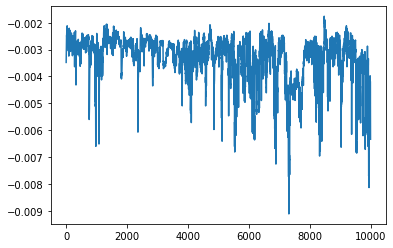

In [ ]:
plt.plot(pred)

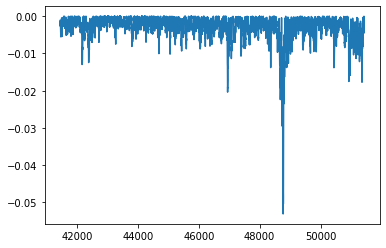

In [ ]:
plt.plot(opt_y['low_vola'])

In [ ]:
train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
valid = lgb.Dataset(valid_x.values.astype(np.float32), valid_y.values.astype(np.float32))
params = {
          'task': 'train',              # タスクを訓練に設定
          'boosting_type': 'gbdt',      # GBDTを指定
          'objective': 'regression',    # 回帰を指定
          'metric': 'rmse',         # 回帰の評価関数
          'learning_rate': 0.005,         # 学習率
          'num_iterations':10000,
          }
model = lgb.train(
    params, 
    train,
    valid_sets=[valid],
    callbacks=[lgb.early_stopping(stopping_rounds=10, 
                        verbose=False),]
    )

In [ ]:
lgbm_df['low_vola']

718      -0.014727
719      -0.014353
720      -0.014407
721      -0.013836
722      -0.012836
            ...   
286747         NaN
286748         NaN
286749         NaN
286750         NaN
286751         NaN
Name: low_vola, Length: 286034, dtype: float64

In [ ]:
opt_y['high_vola']

41438    0.000571
41439    0.000424
41440    0.000653
41441    0.000343
41442    0.000767
           ...   
51433    0.003319
51434    0.003331
51435    0.003076
51436    0.003200
51437    0.004988
Name: high_vola, Length: 10000, dtype: float64

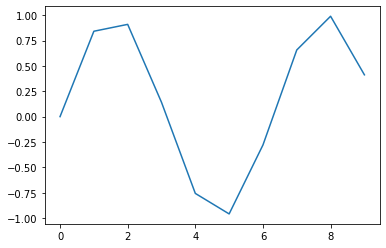

In [ ]:
rad = []
for  i in range(10):
    rad.append(math.sin(i))
plt.plot(rad)

In [ ]:
math.degrees(360)

20626.480624709635